## Getting the data



 [Food-101 dataset], a collection of 101 different categories of 101,000 (1000 images per category) real-world images of food dishes.
used only two of the categories, pizza and steak and build a binary classifier.



In [ ]:
import zipfile


!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-06-11 16:58:11--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.26.207, 172.217.204.207, 172.217.203.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.26.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   109MB/s    in 1.0s    

2024-06-11 16:58:12 (109 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak/

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [ ]:
import os


for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [ ]:

num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [ ]:

import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


 we've got a collection of 750 training images and 250 testing images of pizza and steak.


In [ ]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):

  target_folder = target_dir+target_class


  random_image = random.sample(os.listdir(target_folder), 1)


  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")

  return img

Image shape: (384, 512, 3)


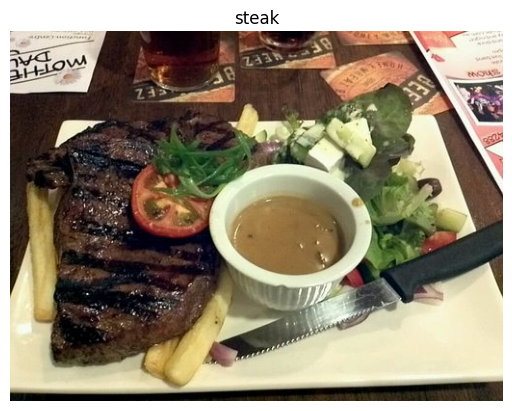

In [ ]:

img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

array([[[149, 132, 122],
        [176, 159, 149],
        [198, 181, 171],
        ...,
        [229, 229, 217],
        [251, 251, 239],
        [241, 241, 229]],

       [[202, 185, 175],
        [227, 210, 200],
        [237, 220, 210],
        ...,
        [248, 248, 236],
        [252, 252, 240],
        [249, 249, 237]],

       [[195, 178, 168],
        [225, 208, 198],
        [239, 222, 212],
        ...,
        [255, 255, 244],
        [244, 242, 230],
        [240, 238, 226]],

       ...,

       [[ 11,  20,  15],
        [  5,  14,   9],
        [  1,  10,   5],
        ...,
        [ 64,  51,  35],
        [ 65,  52,  36],
        [ 59,  46,  30]],

       [[  0,  11,   3],
        [  4,  15,   7],
        [  6,  17,   9],
        ...,
        [ 55,  42,  25],
        [ 59,  46,  30],
        [ 57,  44,  28]],

       [[  0,   4,   0],
        [  4,  15,   7],
        [ 14,  25,  17],
        ...,
        [ 54,  41,  24],
        [ 59,  46,  30],
        [ 59,  46,  30]]], dtype=uint8)
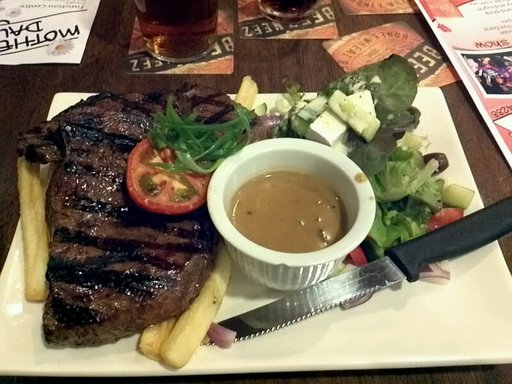

In [ ]:
# View the img (actually just a big array/tensor)
img

In [ ]:
# View the image shape
img.shape # (width, height, colour channels)

(512, 512, 3)



 Many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also referred to as **normalize**) their pixel values by dividing the image arrays by 255.

In [ ]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.09411765, 0.02745098, 0.09803922],
        [0.09411765, 0.02745098, 0.09803922],
        [0.08627451, 0.03137255, 0.09019608],
        ...,
        [0.92941176, 0.86666667, 0.73333333],
        [0.93333333, 0.87058824, 0.7372549 ],
        [0.9372549 , 0.88235294, 0.74509804]],

       [[0.09803922, 0.03137255, 0.10196078],
        [0.09411765, 0.02745098, 0.09803922],
        [0.08235294, 0.02745098, 0.08627451],
        ...,
        [0.92941176, 0.86666667, 0.73333333],
        [0.93333333, 0.87058824, 0.7372549 ],
        [0.93333333, 0.87843137, 0.74117647]],

       [[0.08627451, 0.03137255, 0.09019608],
        [0.08235294, 0.02745098, 0.08627451],
        [0.07843137, 0.02352941, 0.08235294],
        ...,
        [0.9372549 , 0.8745098 , 0.74509804],
        [0.9372549 , 0.8745098 , 0.74509804],
        [0.9372549 , 0.87843137, 0.74901961]],

       ...,

       [[0.86666667, 0.7372549 , 0.6       ],
        [0.86666667, 0.7372549 , 0.6       ],
        [0.86666667, 0

In [ ]:
# Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


tf.random.set_seed(42)


train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)


train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)


model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 14s 170ms/step - loss: 0.6235 - accuracy: 0.6453 - val_loss: 0.4412 - val_accuracy: 0.8060
Epoch 2/5
47/47 [==============================] - 5s 111ms/step - loss: 0.4373 - accuracy: 0.8053 - val_loss: 0.3286 - val_accuracy: 0.8600
Epoch 3/5
47/47 [==============================] - 6s 119ms/step - loss: 0.4208 - accuracy: 0.8247 - val_loss: 0.3627 - val_accuracy: 0.8300
Epoch 4/5
47/47 [==============================] - 6s 136ms/step - loss: 0.3919 - accuracy: 0.8273 - val_loss: 0.3181 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 6s 116ms/step - loss: 0.3163 - accuracy: 0.8747 - val_loss: 0.3381 - val_accuracy: 0.8580


In [ ]:
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_8 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_10 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                 

In [ ]:
# Model-2

In [ ]:

tf.random.set_seed(42)


model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 121ms/step - loss: 0.7098 - accuracy: 0.4973 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 6s 120ms/step - loss: 0.6932 - accuracy: 0.4693 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 5s 107ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 7s 158ms/step - loss: 0.6932 - accuracy: 0.4787 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 104ms/step - loss: 0.6932 - accuracy: 0.4853 - val_loss: 0.6931 - val_accuracy: 0.5000


 It only reaches 49% accuracy on the training and test sets



In [ ]:
# Check out our second model's architecture
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 150528)            0         
                                                                 
 dense_10 (Dense)            (None, 4)                 602116    
                                                                 
 dense_11 (Dense)            (None, 4)                 20        
                                                                 
 dense_12 (Dense)            (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Model-3

In [ ]:
# Set random seed
tf.random.set_seed(42)


model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 115ms/step - loss: 2.6742 - accuracy: 0.6107 - val_loss: 1.4287 - val_accuracy: 0.6360
Epoch 2/5
47/47 [==============================] - 6s 124ms/step - loss: 1.1100 - accuracy: 0.6947 - val_loss: 1.0343 - val_accuracy: 0.6380
Epoch 3/5
47/47 [==============================] - 8s 181ms/step - loss: 0.7012 - accuracy: 0.7147 - val_loss: 0.8198 - val_accuracy: 0.6420
Epoch 4/5
47/47 [==============================] - 5s 106ms/step - loss: 0.6003 - accuracy: 0.7507 - val_loss: 0.5370 - val_accuracy: 0.7420
Epoch 5/5
47/47 [==============================] - 6s 130ms/step - loss: 0.4641 - accuracy: 0.7907 - val_loss: 0.5776 - val_accuracy: 0.6920


Model is learning again. It got ~70% accuracy on the training set and ~70% accuracy on the validation set.



In [ ]:
model_3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 150528)            0         
                                                                 
 dense_13 (Dense)            (None, 100)               15052900  
                                                                 
 dense_14 (Dense)            (None, 100)               10100     
                                                                 
 dense_15 (Dense)            (None, 100)               10100     
                                                                 
 dense_16 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Visualize

Image shape: (384, 512, 3)
Image shape: (512, 512, 3)


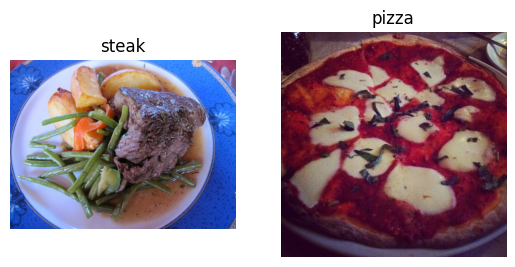

In [ ]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)


In [ ]:
# Define training and test directory paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Turn data into Batches

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


 Training dataset has 1500 images belonging to 2 classes (pizza and steak) And Test dataset has 500 images also belonging to 2 classes.



In [ ]:
# Sample of the training data batch
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [ ]:
# First two images
images[:2], images[0].shape

(array([[[[0.01568628, 0.01568628, 0.02352941],
          [0.01568628, 0.01568628, 0.02352941],
          [0.01960784, 0.01960784, 0.02745098],
          ...,
          [0.01568628, 0.01568628, 0.02352941],
          [0.01568628, 0.01568628, 0.02352941],
          [0.01960784, 0.01960784, 0.02745098]],
 
         [[0.01568628, 0.01568628, 0.02352941],
          [0.01568628, 0.01568628, 0.02352941],
          [0.01960784, 0.01960784, 0.02745098],
          ...,
          [0.01568628, 0.01568628, 0.02352941],
          [0.01568628, 0.01568628, 0.02352941],
          [0.01960784, 0.01960784, 0.02745098]],
 
         [[0.01568628, 0.01568628, 0.02352941],
          [0.01568628, 0.01568628, 0.02352941],
          [0.01960784, 0.01960784, 0.02745098],
          ...,
          [0.01568628, 0.01568628, 0.02352941],
          [0.01568628, 0.01568628, 0.02352941],
          [0.01960784, 0.01960784, 0.02745098]],
 
         ...,
 
         [[0.6392157 , 0.6       , 0.6039216 ],
          [0.62745

Due to our `rescale` parameter, the images are now in `(224, 224, 3)` shape tensors with values between 0 and 1.



In [ ]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.],
      dtype=float32)

### 3. Create a model (Baseline)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
model_4 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding='valid',
         activation='relu',
         input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

Since it is a binary classification problem (pizza vs. steak), the loss function we're using is binary_crossentropy, But for  multi-class, we can use categorical_crossentropy .

Adam  is the optimizer and evaluation metric is accuracy.

### 4. Fit a model



In [ ]:
# Check lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 198ms/step - loss: 0.6262 - accuracy: 0.6733 - val_loss: 0.4172 - val_accuracy: 0.8140
Epoch 2/5
47/47 [==============================] - 9s 192ms/step - loss: 0.4260 - accuracy: 0.8253 - val_loss: 0.3766 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 9s 191ms/step - loss: 0.2717 - accuracy: 0.9100 - val_loss: 0.3451 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 9s 191ms/step - loss: 0.1141 - accuracy: 0.9720 - val_loss: 0.3705 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 9s 191ms/step - loss: 0.0478 - accuracy: 0.9900 - val_loss: 0.5217 - val_accuracy: 0.8220


### 5. Evaluate the model

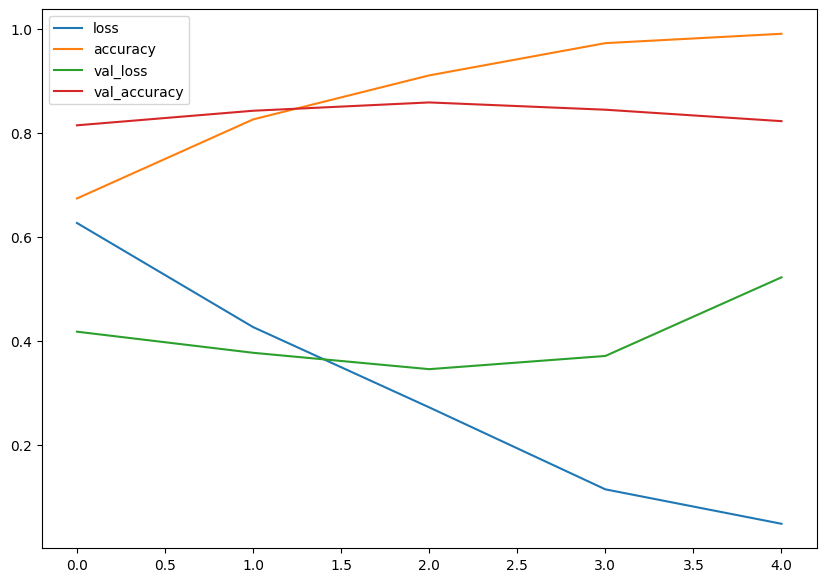

In [ ]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

By looking at the plot we can say it is overfitting the training dataset.


In [ ]:
# Plotting the validation and training data separately

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

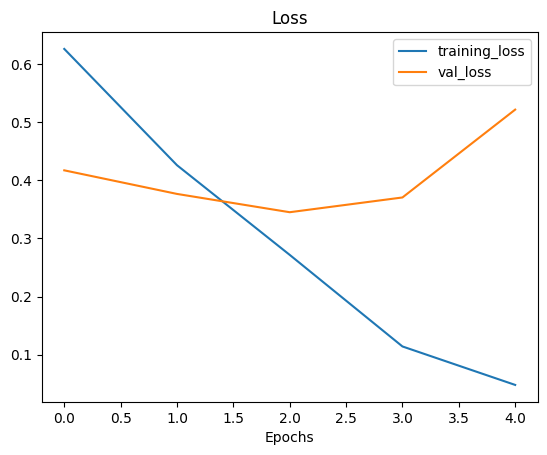

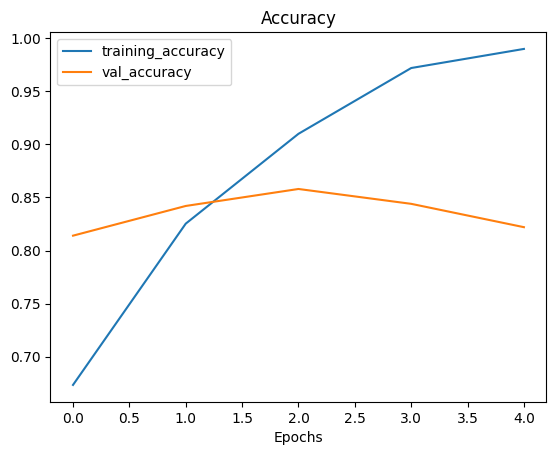

In [ ]:
# loss curves for model_4
plot_loss_curves(history_4)

The ideal position for these two curves is to follow each other. If anything, the validation curve should be slightly under the training curve. If there's a large gap between the training curve and validation curve, it means your model is probably overfitting.

In [ ]:
# Model's architecture

model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 6. Adjust the model parameters

 To Reduce overfitting.

Let's built the same structure as model_4 but with a [MaxPool2D()] layer after each convolutional layer.

In [ ]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

In [ ]:
# Compile model (same as model_4)
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 196ms/step - loss: 0.6482 - accuracy: 0.6240 - val_loss: 0.5451 - val_accuracy: 0.7100
Epoch 2/5
47/47 [==============================] - 9s 190ms/step - loss: 0.4537 - accuracy: 0.8013 - val_loss: 0.3536 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 9s 192ms/step - loss: 0.4161 - accuracy: 0.8233 - val_loss: 0.3578 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 9s 192ms/step - loss: 0.3903 - accuracy: 0.8353 - val_loss: 0.3509 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 9s 192ms/step - loss: 0.3567 - accuracy: 0.8513 - val_loss: 0.3200 - val_accuracy: 0.8700


our model with max pooling I.e (model_5) is performing worse on the training set but better on the validation set.


In [ ]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

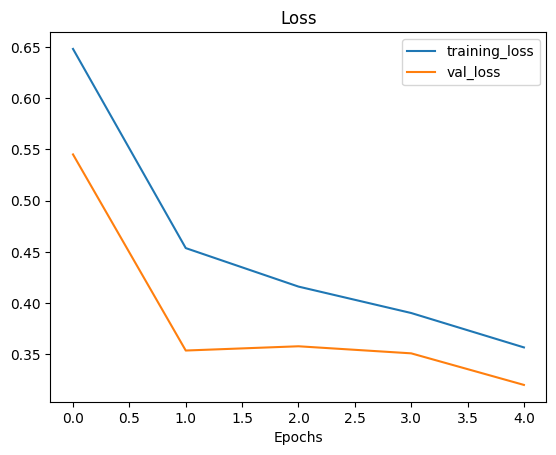

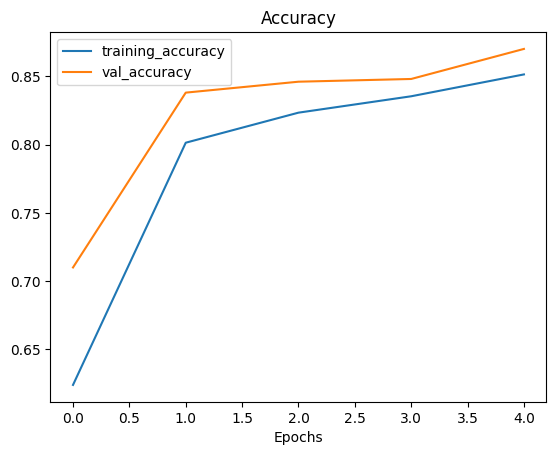

In [ ]:
# Plot loss curves of model_5

plot_loss_curves(history_5)

 We can see the training curves get a lot closer to eachother. However, our the validation loss looks to start increasing towards the end and in turn potentially leading to overfitting.

To implement data augmentation, we'll have to reinstantiate our [ImageDataGenerator] instances.

In [ ]:
# Create ImageDataGenerator training instance with data augmentation

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)


train_datagen = ImageDataGenerator(rescale=1/255.)


test_datagen = ImageDataGenerator(rescale=1/255.)



**Data augmentation** is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.



In [ ]:
# Import data and augment it from training directory

print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False)

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [ ]:
# Getting the  data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same

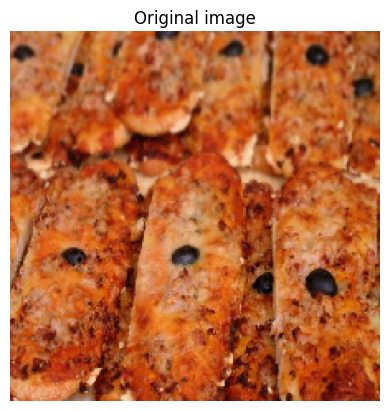

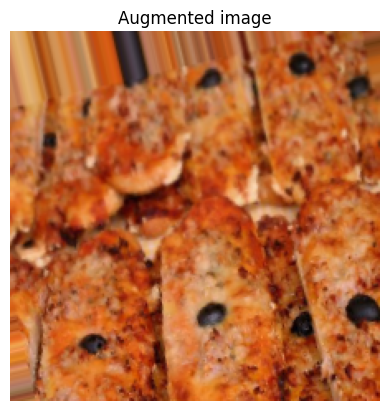

In [ ]:
# Show original image and augmented image
random_number = random.randint(0, 31)
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [ ]:
# Creatimng the model (same as model_5)

model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 472ms/step - loss: 0.8005 - accuracy: 0.4447 - val_loss: 0.7007 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 22s 475ms/step - loss: 0.6981 - accuracy: 0.4267 - val_loss: 0.6918 - val_accuracy: 0.5140
Epoch 3/5
47/47 [==============================] - 22s 474ms/step - loss: 0.6938 - accuracy: 0.5033 - val_loss: 0.6896 - val_accuracy: 0.5100
Epoch 4/5
47/47 [==============================] - 22s 477ms/step - loss: 0.6886 - accuracy: 0.5120 - val_loss: 0.6732 - val_accuracy: 0.5240
Epoch 5/5
47/47 [==============================] - 22s 477ms/step - loss: 0.7195 - accuracy: 0.5187 - val_loss: 0.6886 - val_accuracy: 0.5360


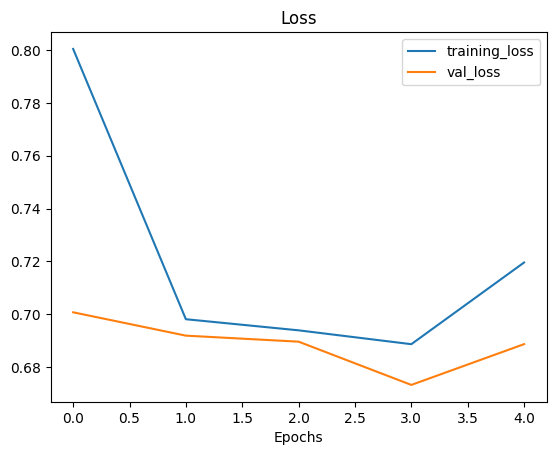

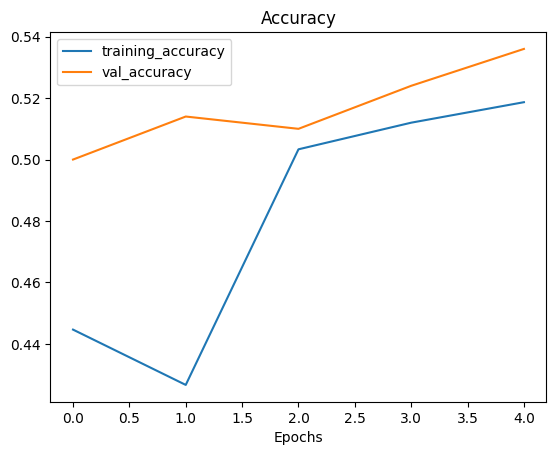

In [ ]:
plot_loss_curves(history_6)

It seems our validation loss curve is slightly better compared to previous model.



In [ ]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (it is default)

Found 1500 images belonging to 2 classes.


In [ ]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 474ms/step - loss: 0.6685 - accuracy: 0.5613 - val_loss: 0.5886 - val_accuracy: 0.6960
Epoch 2/5
47/47 [==============================] - 22s 478ms/step - loss: 0.5598 - accuracy: 0.7073 - val_loss: 0.4351 - val_accuracy: 0.7880
Epoch 3/5
47/47 [==============================] - 22s 477ms/step - loss: 0.4849 - accuracy: 0.7647 - val_loss: 0.4040 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 23s 487ms/step - loss: 0.4862 - accuracy: 0.7733 - val_loss: 0.4282 - val_accuracy: 0.8100
Epoch 5/5
47/47 [==============================] - 23s 486ms/step - loss: 0.4627 - accuracy: 0.7873 - val_loss: 0.3589 - val_accuracy: 0.8540


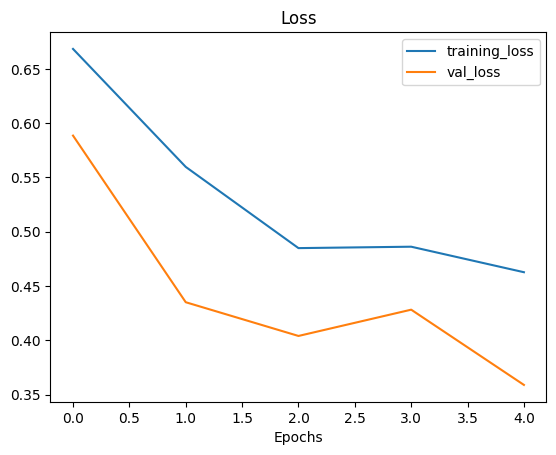

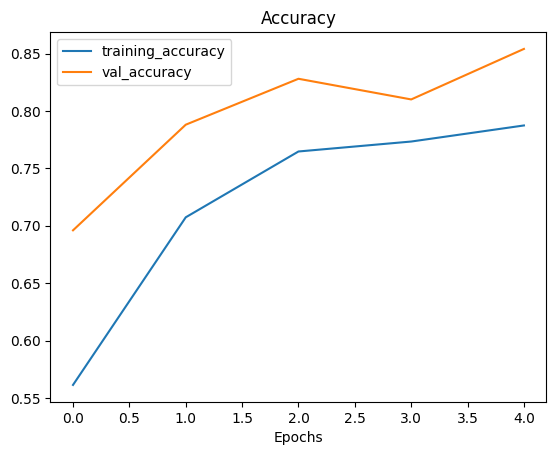

In [ ]:
# Checking model's performance history training on augmented data

plot_loss_curves(history_7)

We can see with model_7 how the performance on the training dataset improves almost immediately compared to model_6. This is because we shuffled the training data as we passed it to the model using the parameter shuffle=True in the flow_from_directory method.

This means the model was able to see examples of both pizza and steak images in each batch and in turn be evaluated on what it learned from both images rather than just one kind.

Also, our loss curves look a little bit smoother with shuffled data (comparing history_6 to history_7).

### 7. Repeat until satisified

We've trained a few model's on our dataset already and so far they're performing pretty good.

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:
* Increase the number of model layers (e.g. add more convolutional layers).
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32, 64, or 128, these numbers aren't set in stone either, they are usually found through trial and error).
* Train for longer (more epochs).
* Finding an ideal learning rate.
* Get more data (give the model more opportunities to learn).
* Use **transfer learning** to leverage what another image model has learned and adjust it for our own use case.




In [ ]:
# Create a CNN model (same as Tiny VGG but for binary classification
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 458ms/step - loss: 0.6418 - accuracy: 0.6120 - val_loss: 0.5091 - val_accuracy: 0.7200
Epoch 2/5
47/47 [==============================] - 21s 456ms/step - loss: 0.5436 - accuracy: 0.7240 - val_loss: 0.3756 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 20s 434ms/step - loss: 0.4750 - accuracy: 0.7813 - val_loss: 0.3389 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 22s 461ms/step - loss: 0.4522 - accuracy: 0.7987 - val_loss: 0.4053 - val_accuracy: 0.8100
Epoch 5/5
47/47 [==============================] - 21s 437ms/step - loss: 0.4694 - accuracy: 0.7833 - val_loss: 0.3122 - val_accuracy: 0.8720


In [ ]:
# Model_1 architecture (same as model_8)

model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_8 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_10 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                 

In [ ]:
# Model_8 architecture (same as model_1)
model_8.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_16 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_18 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                 

Now let's check out our TinyVGG model's performance.

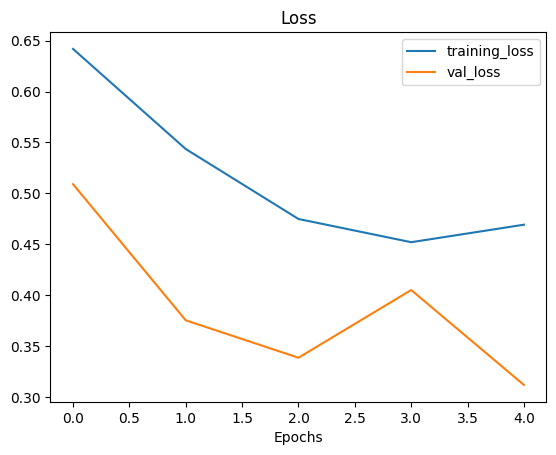

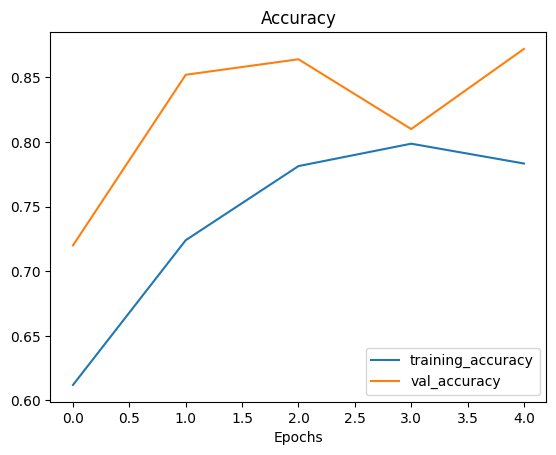

In [ ]:
# Check out the TinyVGG model performance
plot_loss_curves(history_8)

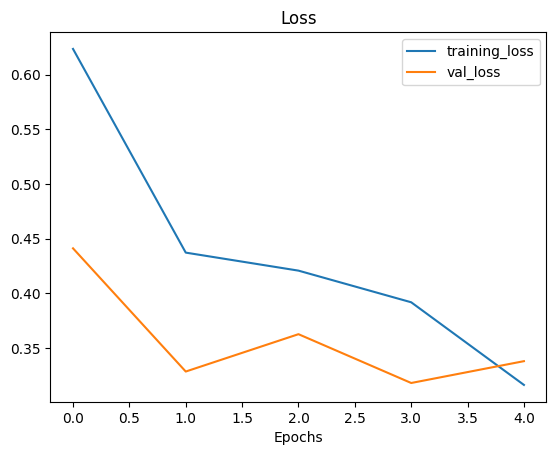

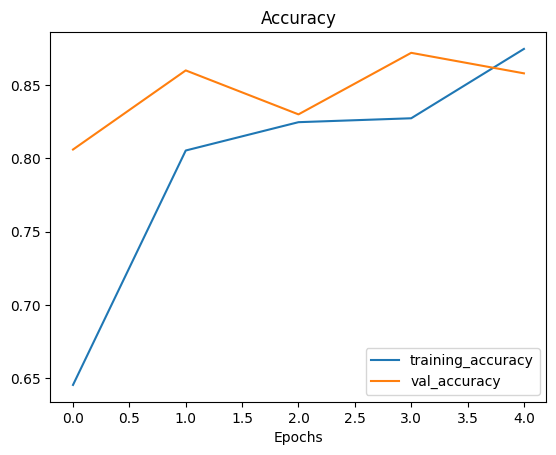

In [ ]:
# Comparing the curve to the one above
plot_loss_curves(history_1)

 Our model's performance on the training and test sets didn't improve much compared to the previous model.


### Making a prediction with our trained model



In [ ]:
# Classes Names
print(class_names)

['pizza' 'steak']


# Testing a downloaded pic from the Internet.


In [ ]:
# View our example image
!wget data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBwgHBgkIBwgKCgkLDRYPDQwMDRsUFRAWIB0iIiAdHx8kKDQsJCYxJx8fLT0tMTU3Ojo6Iys/RD84QzQ5OjcBCgoKDQwNGg8PGjclHyU3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3N//AABEIAJQA6AMBIgACEQEDEQH/xAAcAAABBAMBAAAAAAAAAAAAAAACAAEDBQQGBwj/xABCEAABAwIEAwQJAgQEBAcAAAABAAIDBBEFEiExBhNBIlFhcRQWMlaBkZSh0UKxBxUjJDNSYvHB4fDyJSZTVGNysv/EABkBAAMBAQEAAAAAAAAAAAAAAAABAgMEBf/EACURAAICAgICAgIDAQAAAAAAAAABAhEDEhMhBDFRYRRBIjLRkf/aAAwDAQACEQMRAD8A4uAnARAIgFi2dKQICIBEAiDVNlUAGogEYaiy6JWVRGGog1SBqfKpsqiMMThqlDU+VLYdEWVNlU2VPlS2DUgypZVPlTZUbBqQlqYtUxamLUWGpCWocqnLU2VVsKiCyEhTlqQjLnBrGlzjsGi5KqyaMchCQpnCyEtTsmiIhDZSuaQdQQgLVVkNEZCYhSEW0KEjWypMlojsmRkIbKrJaBSTpIFRmAIgEgEYCwbOlIQCINTgIwFLZaQIajDU4ajAUNlpABqINRgIg1S2VRHlRZVJlRZVNjohyp8qlyp8qVj1IcqWVTZUnADbVOw1IC1NlWQ9mXqD5FDlRYqIC1CWqYtTFml9LXsqTE0QEJNLmOzsc5rgdHNNipC1FCI+aDM0mIbhpsSO7wVpktGPlbscwcetk7wC45mNjvpmYDuB4lSymIuHJjc0bdtwP/AIYXgnJlY8l2jXEnXxsVSZm0RTkym+VsbSdGAnK3TW37qbBsGrccr2UOHRF8zhc9A1vUk9yy6PC569pjo6CvfNIWMgLWXYXX7Rc6wsLbLovCQh4So3wQw83EapwbUTbNFtMrfAXKJ5FBWOGKWR1EeHhnhehw/+Vz4eyurWgunlvlkJ/wBJBBAVNiH8OaDEIpZuG6yWN7BrT1Y08g5bpBgkEs0s8gkjme9r+Yx1y/w1BUbaw4XmEUzo5JRYNnbdodsCev3Xm/lZIS+Ud/4uKcdV/Y4VX4fVYfUSQVsLoZY3ZXNfob/jxWKQu2cd8HTYhw/JXzT+lYnTsMgeGAZ27ltgNt7f81xZkhYSW2NwRqL6FeriyrJGzyskNHREQknISWpnRnBGAmARALnZ1JBAIwEwRhQ2WkIBGAmCkChstIYBGAkAjAUNlpDAIrJwEQCmykgLJ8qOycBKx0Czs37LXXBHaF7X6jxQluug2CmaG3N736WHVFLEWMjJ/ULjxTsKIJI2tLDnuHNubDbwQO7RLtAe4DRXVBw/WVljl5bXezn3PkFs1PwZRshfJLG6QM9p1RUllz3BrGj/APRS5I+hvGznuUW3ANwA3qfJZkOEVz8rxAWNPsmSwzdNBuulU2GUeB08lSI6eKa39NzIbAjuLj2j9ld4JLTVlPA9+HU8QsXkgDQ+Z18VnLyEv0LjpW1ZzyP+HmIeisnqHuYSR2AzYd91OeBaeB2eolLqRozvm5na8g0DXVdGxSeonwiVsDgxrPac0kloJ163va+/yWs8PUVXPDPE5rsj39guB0ZbfVRzt9p9F40qbdEvC/C/DwjaWQwVb3vNnSxg5NNAbi/TvWyw08cLJRSikhDeyA1ot8QsCgbTYdVviDAI2Bt3PIOY99+uungsTGaqRtcx0Mf9rmLbMZZpcBc/H8Kd3L2JR2nS9FjV45DhjHNfHzA0e00ZWl1ulgqMcNVM+JCpiqoHQzu5oaHElt9brDrsUE8csEUPOmdYWIsG+Pmt4wSSOhwWkjlmiFRHGA8iO/Tb4JS7ReS/HVw9sgw3D4MNZUl1QXzOAzG2w8ANitd4gw6avLqpjcr4Q4ZWm4kHTqrbGK97YpvRntZU1Az87/0mD9R0+S1/E8ffQ1Y9GljJljs5jowM99r2URdOn2PApJ7r2XmBV9O7B2xyyF7mi9nDW3cuBcQ0LcOx2uo49I45ncv/AOp1b9iF1UVZoGSVGIPghcSS5zjlAuO7dcy4rr6fFMamqqRtmODWk2tnIFrgeVl2+DLJvK10c3nRhdxfZSkJJFJemeaZwRhRhSBc7OlBhGEARAqGWiQIwowjBUMtEgRBACiBUmiDCMIAUQKhlIMnQWbrfe+6OPK27nNa636CT2h5hRA6rYMF4dlrG8yaKVzrBzIGt1cO8nYDuG5/dN0rKitukVcNJPNYwMLmkjKTu7fp8FtOE8MMaGVU8hLrgxsMZ3v3dyvcVqKTA6H0WkiMmJtisZNDytthZYtLi1T6A0zVMrnAnfUj5LJz67OiGPq0v+m2Uxo6cRmqhDaiOxJcbjXQEW/Y96PF8Lnme6r5rWytZdju5viNLKlwOlxFtcK2ZxbSWIdE4Xc+408tbbrZa0yT0Jp2sLg9oa6xBcB+FjtBurObJcMip2c9Y+grqtkeIVNbVjb+nGGMv53ubd9lulK2KIllPNT8prQWMDe03pqq2KgmgqnxU1I8ub+nJoB3klXEAoqGmzVMwdNcm7Ldo9d+gCWSO6pm2ZxTWrs1+sxUYfNI+ARPke/K8Oa7tne2u2muiwcZ4jroiGtHKjmYC0M3I8/9lsJjgxOEh1A8xuk/pc7eQnqBvoouKcCw2anbHG/JVtaA3Iey0DfzHhunihGMbZMcmPZJopsRrY5aGgIzyVZe1jY2CxeDuPLxWwV9EZWOp5QGwyH2yQHN00I8Vq1C5tK/JS1bJpNDK9jO1G0HvufssLhXFZcY4pxN1TLJPTtDWwNPa1uRf9/sjInlTceqDJSktTbcNqcEw98UYmY9w0bqLk+AWuV+JVuL8Rvhpqcx00JzCEkNLxfc+F1gcQ1zAS2kopY52VH+M5l8rWi5tbvtb4rLwmuihrsOxmrcyH0qkMctNG29iCAwb6auO/QFbY8bcbZDlq7StsysUqpgXidjGyPcM8ee4F9jYJVgo8Dw+sx2alY+WCK8AeN5To0Aedj8CqTGRXVPHbG0lNLNTyNjhmLWEgMLhc+BGhWd/E3PXQU2F0E9MGQuD6lrnkOL7aAAA+KIYFHInfRPJOUHGK7OU1tTLWyc6okklmcSXyPffMT3d3ksU6+Xkthg4TxqqjlkpaN0sEZJDnPYMw+e/hqqKaF8MvLkyh7faAN8vgfHwXrxlF+jz5RlH2QlJMUlRmZjSjBUIKMFYtG6ZMCiBUQKMFQ0WmSgowVCCiBUNFInBRXUAKMFS0WmSgorqG6ueG8J/mdU6Sdj/QKYcypkbbQdG69SparspO3SLDh2gjigdilXFzXNH9vARv8A/I4f5R0HU+Gq6JgtVhVNRMrZ56rNGcxDGPcDfXtWCr6fhvE8cpTUw08UUEhY2NspLf6QOlgBtbQBW8mG19FyKaGeLlQlpyj2jHYA3HXYrlyS/cvR0y4lDRPv9mW2rw+so31lLPSVNRM0uY4EaN67bfNUcle6KskpmUcdTVvAJaB2Ym9Lm2/gsmhwfD6OtkqaSl5fpQIkyh2R2vdsNd09XST01cZaOnjjkndZ73S7iwFzrv4AHRcsp43L2Ti1TpihrnQWkxRpo4g7R0cujR4A+ataioYyjP8ALow6UsLYzmzN8Cev2VU2kbzvTcdq4ZY4nAsD+yxpB8d+isJcVoJadzsPr4JYzpGY3Bzcxv0GullWsdW4k5Utk4r/AA1CoxGsbzIX4pLFUSXbcxuIcet9LdUeGSVXLZPiQZFJG3LTueSI5H2313Nr6WVw+SVgDKRkUryRzpHattv3ap66pnngPpGaXlu7Nm2Lr7ABPlTOlSvqiSnpa4TxvrsRj5z2ENdEAxjGkXA1Ouu/w+MFVw+9jXCauqJ+Zbswt5dx4m11WVGCTTSmeJzoJG/pY4jp1Py0WwcLY7TsHoWI2FZTtszOfaBO4PVOS2Vx6ZnmxuC3XZTYvgNJgHD5kEIdPU9l0sl7sabk/stfbyoaZrYnFoLbNLWFoPhe266rJTsxJhdWwMlbG6+UkGyNtRQQtjLqcNhdez3WsElkXUbIxeRpGtbZqFBh0mJUL6ivZKx5cS0NAYZdBY67eakZwUKgGSaVgbmaRd/zBI6qyxirxOlz4lhs8c1M1pJo5I7g28dwbLHwzHW4vSROmjbAeYS6LtaEH4BbNUg5czVrpFnRYPDQ84mo5khZf2TZltjqud0dMcRxkNgje+J7rvkGhP8A3H91snEOIyVUMVFRznPUG3Ljt2he3aOptdZcNNRcKYYXyyh1UWEve52yI40ukaY5vFFyk+36MTiXEabhvAZQ1jBkZ7A6u6BcGqJTNJLLMCZHvc55/wBR1P3V7xnxJJjlaWsefRmE5dfaPetbc6+q9Px8XHHv2eVnybyGKSEpLoOazIBRgqIFECoo2TJg5ECoQ5EHKWirJwUV1AHIg5RRSkTByLMoAUWbRLUpMmzA77LrHDlBTUXCtDRTPa2qrP7qZhvcjpcdwAA+BXM+HqZtdjuH0rxdktQ0O8QNSPsus1HKbxaDJTukzxgPfG4gRNGgB8La28Vz+RaVL9nRgWzf0bVHiM0FI70QPdFGGlxeLDUXN+q1jEMVmqJ3SULpP6mmd9xm8h3LZauemmiMFNmkdHAZDyR2mDb2RuSqLE+E3UQZLDUTGF7QcgsHX1JBv36ALkeN1cv0aeO8al/L2yvw9uKGrawVctS6U6xBxIDb669FuE1GyCH0uqY1kjT2ezmdbuHiqvh//wAKo3yzOMcLyOU5/tX66Af9WVp6wYbIS17hdugkAJN/ks9YydhncnP+C6NJxLDK3FHS1NTC8R5uyyV9nRs6G3TxG6GkjioKYQ4bAZpnh13uBDY9RrqLknX7K/ly1te50YqOZTusyAuIzaXzm297rCnkqqNktZWUjydbNOsh010Gp1t80btS1o6Y5NklIjo62nipyMWY7ls05kozG+9h392ivKfG8Oqc7mOdnDcwDdsv/XRUcfCcuM+j1mJvmiiIHKhtleHHzV+zh2jp6XkTRNc1gGbM3MXd1wnLr0YZJYr6ZrmL4k2va30OGra6GYNjdGw/1Cd7juUVbw7ieKwGM0cUsT7BxkFsnx7wtodW0WFjJoXgZQ23+GLdBso5McMEjGyPaYpmgxjYj47aqE5+4o0WWcVUEQ4JhOO4VRwvppWVUcIyBsj7ktvrr3rE4nlqajNWh2eODQsaDdg6nx8SrPGcbZT4fyoJg2ScEudm9loGtj8QtGr8cZA9hZUB0gdlzAgWv3f81e0m0qFgxzm92kTDHXxNkgOVxtfQ3A03JUTcbpJGQ4dQUYnma8XPMIub63sNAqCoqW1L3Goc1sUru2Y7C4B2A3V1U4/g/D1BaghjbUOFg7L2v91uo26S7N88owjckXbpKHAS7EasUtK9sdo4IdmDvPeVy7iziuoxyaRjXFtPfQ31KwMYxWpxWYSVZlbTuNwcp1F9T4qqjme0f09DYhxG5B3XoYfH17l7PEy+Rt0gXEdEJKZx1NkJK6aOZysclJDdJMmyYIgiDEQYs7N0mALoxdEGIxGpbKSYGqcXUgjRCNTaK1I9URNwNLW8b3UnLT8tTsitWS4XXSYfiFLWMvenlEgHeOo+IXUOKqYTvjxqncZKGrY2VhZ3Fo0+xXLmxANzZrEHZblwLxUMKyUGJDPQse50Lrf4D3bm3dv5XKxzLaPRtgyPFPY2zAeIf5HRxU5o3QPaSXPyXMl+p63WwyY4ycRymoEjJbB1zlIvsLdEDzQ4lG18jIpGEdmRpuNVTz8KVNTC+Nlcx0H6ISLWHQXXE3KSpnXHgyO5fxZPjcVZNLTcsiGJjtm3e4uPsjRUj6PFKmt5VPRVBkLrcy+nid1f0mIYlg8sNPi9PHytmzsvYNt4aLOmxRobmjnf6MDmzh9+z5pOSgvRceSKqNNEmGNnw6gL6uZtRVi4MmhyAbA9T8VT/wA/ilcA2cslfKBHy2EZ73uCO7RFiHENPVUszWujDhe1zsPDvN+nitMpaiVodVciOFtyXzPF3WJ/T3KVjcnuysWG+5Ls3ehkFO8SUgLWMuZpOYTcnuF97lXRqGw0wFW9hznK4M0OoNgqGhqac4LDURZHtYASCOwHHqSd7aqhnkxXG6qSCiY2SnzaSWzZT3tPQJyTcqol4oydvolxsupm8x0p5cthGSPA3b8LfdYEOLOZGKarkDaV0jS9z7HIARsDorhnDHKDJeJsaiY0fpZo4+Fygmxzg7h4mWkibPUAWEjzncB4F23wXTDG6HLyMcY17MLGqio4jcIsFpJnMZcZw3su07+lk0PDuEYHTCbiOaJ87hd0bjc38vyqbHv4o1c8Ziw1vJadi0WsPP8AC5/iGI1OIPc+rnc917tb+m63x+M376OLL53WsfRs3EPEOEtkczBaIsB3dmIabdbLWK2aSYiWcG8gu0nqOpWJcg367J3OBjDbdoH2r9O5dsMcY+jzsmbJk6b6EXC1mjLc667oA4t2JFx0KOKR0WbLa7mlpJGwO9kNgdSrMaAukislYIAFJGAEkDosAEYCFpCMOXMzsQQCMBCHIg5ZstBBqMNQhyMOUuy0OGow1CHIw8KHZaokgcYZWSNDS5jg4BwuLjwROdmLpMtpC/Nmabb7iyjDgnDwlbHSFTYtX4XJnoKmSLX2QbtPwOiuqH+ImJQH+4ibJ/qY4t+xv+6opGNk8FiSUf8AlKtaS/siJXfR0um/ipSSNEdbSPyEWIc3NdOOKODZ87n0wZe5ym4BPkuWPhe3oojcHYp/j436Ess4eujptXWcGVcUhhkfTTlvYyPs0nxGykGIcF02Htgnq5qiUj+rKCbuPh0A8lyy9jdMSOqpePGhvyp/J0KTiXhSkbyqPC31DL3tUSuLXebdisSu/iRXvj5VBEyniGgZC0MaPgFo5ITF1/JaLDH9mUs0n+zOrcZxCskc+epkLnbm5v8ANYLnFziXEknqSmvYpibknTXuFlqkl6MZNv2DulbSyd7i462v4ABMbqjNglCUeUna6XLd3J2KiNJSiEnwT8rvKLQasgRBpUuRo6J9ktg1IwxJHdJFgSh6IPXq/wBQuEvdzDPpm/hL1C4S93MM+mb+EuMfKeUxIiEi9VeofCPu5hn0zfwl6h8I+7mGfTN/CXEPm+jyuJEYkXqX1D4S93MM+mb+EvUPhL3cwz6Zv4S4h8/0eXBInEi9QngPhL3cwz6Zv4VbHw9wM6o5R4fw0XaC1xpGgOJLhbbfspcI/wAj6POQkTiTxXopuBcCX14ew9rDms91ELOsQNDb/UEb+HeBWgf+X8OI7xSAixJbfba4OqOD7D8n6POfNS5y9FyYBwI3KBgOGG72sd/atGUuNhfT7KWo4W4Hp3PbNgWFtyOs7+1bobX1NugIJ80uBfI/yfo8381A4sdoWj5L0pTcL8DVOfk4DhZDAC69KBa5IHTvBUVVw3wVSySNl4YoRyzZx9EbYNygl3kLp8P2H5P0ebDHEf0j4ITDF3fdejv5NwMQSzhmheNQS2kZobOIHgSGk/JSer3BgnEQ4XoL3YA70aO1nXsb7fpIT4n8i518HmzkRd33Q8mPu+69IyYNwOwlj+GaESBrnFnosYLbODdfO9/IFW0PA/CE0LJW8OYZZ7Q4XpWjf4J8b+SeVfB5X5MXcfmm5cf+X7r1Z6h8Je7mGfTN/CXqHwl7uYZ9M38J8b+Rcv0eUiyP/L9k1mj9I+S9XeofCXu5hn0zfwl6hcJe7mGfTN/CNA5fo8oZh3Ji9esPULhL3cwz6Zv4S9Q+EvdzDPpm/hGguQ8ml6EuXrT1D4R93MM+mb+EvUPhL3cwz6Zv4T0FyHkkuQ5l649Q+EvdzDPpm/hL1D4S93MM+mb+E9RbnkW6deufUPhL3cwz6Zv4SToWxsiSSSZIkkkkAJJJJADO3AWC/CqDI8GkhIccxBbudTf7n5p0kACMLoC1g9Dhs3YZdtvwPkEb8None1TRHS3s9L3/AH1SSQAAwqg/9pDtf2B0Nx9yT8UUmG0UjyZKWJxcRe7d9LftokkgCWKmghu6GFjCRYlo6b/8VHJhtFNI+SWlie95BcXNvcgW/bRJJAEbcKoAXEUkV7W9nz/JT/y2iJH9rF2ni/Z3sCQkkgAv5bRMiDGUsIY1paBkGgO48tB8lmt9kJJIAdJJJACSSSQAkkkkAJJJJACSSSQAkkkkAf/Z


--2024-06-11 16:45:17--  ftp://data/image/jpeg
           => ‘jpeg’
Resolving data (data)... failed: No address associated with hostname.
wget: unable to resolve host address ‘data’
/bin/bash: line 1: base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBwgHBgkIBwgKCgkLDRYPDQwMDRsUFRAWIB0iIiAdHx8kKDQsJCYxJx8fLT0tMTU3Ojo6Iys/RD84QzQ5OjcBCgoKDQwNGg8PGjclHyU3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3N//AABEIAJQA6AMBIgACEQEDEQH/xAAcAAABBAMBAAAAAAAAAAAAAAACAAEDBQQGBwj/xABCEAABAwIEAwQJAgQEBAcAAAABAAIDBBEFEiExBhNBIlFhcRQWMlaBkZSh0UKxBxUjJDNSYvHB4fDyJSZTVGNysv/EABkBAAMBAQEAAAAAAAAAAAAAAAABAgMEBf/EACURAAICAgICAgIDAQAAAAAAAAABAhEDEhMhBDFRYRRBIjLRkf/aAAwDAQACEQMRAD8A4uAnARAIgFi2dKQICIBEAiDVNlUAGogEYaiy6JWVRGGog1SBqfKpsqiMMThqlDU+VLYdEWVNlU2VPlS2DUgypZVPlTZUbBqQlqYtUxamLUWGpCWocqnLU2VVsKiCyEhTlqQjLnBrGlzjsGi5KqyaMchCQpnCyEtTsmiIhDZSuaQdQQgLVVkNEZCYhSEW0KEjWypMlojsmRkIbKrJaBSTpIFRmAIgEgEYCwbOlIQCINTgIwFLZaQIajDU4ajAUNlpABqINRgIg1S2VRHlRZVJlRZVNjohyp8qlyp8qVj1IcqWVTZUnADbVOw1IC1NlWQ9mXqD

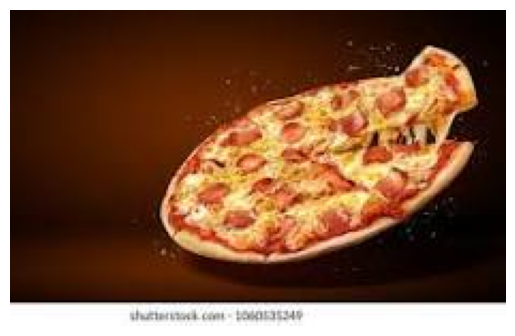

In [ ]:
Pizza = mpimg.imread("/Pizza.jpeg")
plt.imshow(Pizza)
plt.axis(False);

In [ ]:
# Check the shape of our image
Pizza.shape

(148, 232, 3)

Since our model takes in images of shapes `(224, 224, 3)`, we've got to reshape our custom image to use it with our model.





In [ ]:
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """

  img = tf.io.read_file(filename)


  img = tf.image.decode_image(img, channels=3)

  # Resize the image
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image
  img = img/255.
  return img

Now we've got a function to load our custom image, let's load it in.

In [ ]:
import tensorflow as tf

In [ ]:
# Load in and preprocess our custom image

Pizza = load_and_prep_image("/Pizza.jpeg")
Pizza

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[7.0588239e-02, 1.9607844e-02, 0.0000000e+00],
        [7.1008407e-02, 1.9607844e-02, 0.0000000e+00],
        [7.8431375e-02, 1.9607844e-02, 0.0000000e+00],
        ...,
        [2.3529412e-02, 1.1764706e-02, 0.0000000e+00],
        [2.3529412e-02, 1.1764706e-02, 0.0000000e+00],
        [2.3529412e-02, 1.1764706e-02, 0.0000000e+00]],

       [[7.0622623e-02, 1.9642232e-02, 0.0000000e+00],
        [7.2831005e-02, 2.1430446e-02, 0.0000000e+00],
        [7.8431375e-02, 1.9607844e-02, 0.0000000e+00],
        ...,
        [2.3529412e-02, 1.1764706e-02, 0.0000000e+00],
        [2.3529412e-02, 1.1764706e-02, 0.0000000e+00],
        [2.3529412e-02, 1.1764706e-02, 0.0000000e+00]],

       [[7.1838111e-02, 1.9667242e-02, 0.0000000e+00],
        [7.5283237e-02, 2.2755977e-02, 0.0000000e+00],
        [7.8484513e-02, 1.9660989e-02, 5.3146159e-05],
        ...,
        [2.3529412e-02, 1.1764706e-02, 0.0000000e+00],
        [2.3529412e-02

Wonderful, our image is in tensor format, time to try it with our model!



Although our image is in the same shape as the images our model has been trained on, there is still missing a dimension.

The batch size becomes the first dimension.

So in reality, our model was trained on data in the shape of (batch_size, 224, 224, 3

We can fix this by adding an extra to our custom image tensor using [tf.expand_dims]

In [ ]:
# Add an extra axis
print(f"Shape before new dimension: {Pizza.shape}")
Pizza = tf.expand_dims(Pizza, axis=0) # add an extra dimension at axis 0
print(f"Shape after new dimension: {Pizza.shape}")
Pizza

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[7.0588239e-02, 1.9607844e-02, 0.0000000e+00],
         [7.1008407e-02, 1.9607844e-02, 0.0000000e+00],
         [7.8431375e-02, 1.9607844e-02, 0.0000000e+00],
         ...,
         [2.3529412e-02, 1.1764706e-02, 0.0000000e+00],
         [2.3529412e-02, 1.1764706e-02, 0.0000000e+00],
         [2.3529412e-02, 1.1764706e-02, 0.0000000e+00]],

        [[7.0622623e-02, 1.9642232e-02, 0.0000000e+00],
         [7.2831005e-02, 2.1430446e-02, 0.0000000e+00],
         [7.8431375e-02, 1.9607844e-02, 0.0000000e+00],
         ...,
         [2.3529412e-02, 1.1764706e-02, 0.0000000e+00],
         [2.3529412e-02, 1.1764706e-02, 0.0000000e+00],
         [2.3529412e-02, 1.1764706e-02, 0.0000000e+00]],

        [[7.1838111e-02, 1.9667242e-02, 0.0000000e+00],
         [7.5283237e-02, 2.2755977e-02, 0.0000000e+00],
         [7.8484513e-02, 1.9660989e-02, 5.3146159e-05],
         ...,
         [2.3529412e-02, 1.1764706e-02, 0.0000000e+00],


Our custom image has a batch size of 1! Let's make a prediction on it.

In [ ]:
# Make a prediction on custom image tensor
pred = model_8.predict(Pizza)
pred

1/1 [==============================] - 0s 349ms/step


array([[0.17782606]], dtype=float32)

The predictions come out in **prediction probability** form. In other words, this means how likely the image is to be one class or another.

Since we're working with a binary classification problem, if the prediction probability is over 0.5, according to the model, the prediction is most likely to be the **postive class** (class 1).

And if the prediction probability is under 0.5, according to the model, the predicted class is most likely to be the **negative class** (class 0).

So Using function to convert predictions into their class names and then plot the target image.

In [ ]:
# Our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# Index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'pizza'

In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 22ms/step


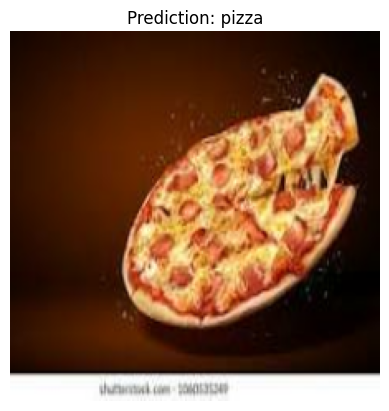

In [ ]:
# Test our model on a custom image
pred_and_plot(model_8, "/Pizza.jpeg", class_names)

Our model got the prediction right.


In [ ]:
# Download another test image and make a prediction on it
!wget data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBwgHBgkIBwgKCgkLDRYPDQwMDRsUFRAWIB0iIiAdHx8kKDQsJCYxJx8fLT0tMTU3Ojo6Iys/RD84QzQ5OjcBCgoKDQwNGg8PGjclHyU3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3N//AABEIAJQA4QMBIgACEQEDEQH/xAAbAAEAAgMBAQAAAAAAAAAAAAAABAUBAwYHAv/EADwQAAIBAwMBBwEGBQIFBQAAAAECAwAEEQUSITEGEyJBUWFxkRQjMoGhsQdCwdHwFfEkM0NS4TQ1YnSy/8QAGQEBAAMBAQAAAAAAAAAAAAAAAAIDBAEF/8QAIhEAAwACAwEAAwADAAAAAAAAAAECAxESITFBBBNRImFx/9oADAMBAAIRAxEAPwD3GlKUApSlAKUpQClKUApSlAKUpQClKUApSlAKUpQClKUApSlAKUpQClKUApSlAKUpQClKUApSlAKUrBoDNKiTztaBpJMtGPP0qsvO0kdi6pc20x3cho8MDVbyyvQX1KpV18Eb3sL5YsZ7xYd4/TNWlvcR3MKTQtujcZBxipKlXgN1KxSpAzXzmsmvPO2faS7mvE07Sbp7WFGIubpcBgwxhVz8n6VGqSJxDp6R6Fn86+ga8ug7SXiExHUHZoVwhV8naMDJHQ+XJrrNI7UW0tqW1CaOHam7vmYBXA9PeozkT6JVicrZ0tKqtH7Q6ZrXef6ZdCbujh/Ay4+oFWmamnsqa16ZpWKzXQKUpQClKUApSlAKUpQClKUApSlAKUpQCsVmsGgPiaNZY2RxlWBBrgO08T6Vd20WoTMbC7JiWYDmGTqrZ8q76aaOGNpJnCRqMszcACua7Savpc9si4W7KOHVNuVYeY+hrPmiaW2dUuukcbK/aXQ78waZPC0gO9YWH/qF9vInz8j710OkfxBE47nUdPkhu1HijXgk+ytzXC9o+1keyW1toNv2ZxJZyb9zwrkAqfUcn4ro9D1PSe1mhpLf24luE+7MsXhcMB5HrnzxWaaceM5xc+lvcdu2O42tvnaeY9hZv0r6t+3Uyp3l5p7iHoZFBGD7g1yiacdPeVtGaO5V5Nzyrnk4/nUcqfy8q1mS+l1FyqoqiAFh3m9cbiCQc/vT9976Zsn9TSPTbPtLpt7aTT21wrtEhdo8+Lp5DzrzLWlSC1kln37By2DyD5/XNSraArcyF4whI8DYGTn3qH2juE+zjT0lDSEBFwCTnIzk+ePX5q126XZZOOZbUkezmt7aUzQRAPwBkiQ4J65xj+lSNVdf9PgxCgWackB+Vyef8xURbVUuIIo0LqoBLs2TkeZ9OtSNUe37iS4tXik2xs29c7ctwPM5P96Lti1pEzSo0eN3kdIYlfMcls5AzkZ56+ldNH24e1dLSawmlkU7WlznaccbgASD74wetcZojzWdqtxEsEsUn4otviLg8kc8n2x5Vs1HWoHmjuraMxzRNtlRgR4QeuT1GKjNtC4mvT1nRtSi1S0FxF4edroSCUPocfOfgirCuG0aQJd2l7BOyrP45Y1OVZThckexxz812kVxDLnu5Ufa207WBwR5fNaoraMVxxZupWOtZqwgKUpQClKUApSlAKUpQClKUArFYZsVyGodtREkgtrCfIcxB5hjLdOnU/pUatT6TiKt9HYZqv1PWLHTlxdTojkEqhPLVw57S6laWV2L3UEM0q7kyAph9cAe1c4NStJr8yPBNLO4LGV055+efKqqzL4Xz+NW+y21XtTe3ynazeIH7uMHYB/Wqg299eybbtnjif8AlU5wOMfFJtRu5rKXuLSadSdkcqARuRyM4P8Ah9K1Xk919rt7cXcLStGATs27CPc9T55A8sVndcmaVKkjahpulWCqrxxmY5XvJn5xUnstcWM15qmnwt3cC2bF24VQV5BB9feo8mn2hvBHel7m4kfmZELKpHJ5/wA61DvtLj2qlsY2lDYjjTqcdQfLHmai0mcySnBL0PtNaXOsLHfRF4pEjSabG1t+MFx+eKldqILjRu0tnDaXUiNKpZZHchpN3nnzAwPpWvSOy6KUvCkbzHIYsCUwOoAPl6k8egqf2m15Lx42CLJNZvsjdo1JQADcT6Zz5ccVH/FGDHrmfdvI8NvJdSsW7rdwfPzGPb3qI9paySw3TxpjawdWbJL8YK/rnPtUa71iP7DhXDNzkY5bw9T9KWtw0lr3btHI4PiVfInn+lXo9bhokySMbZ7PDfaJTgKD+Bc8nP6VC1kTWultbqneqqpEjg5HXLdenT9q2xmWJRukVmyMYGAP89alxTpND9nkTAyOR0x0rrWuyFymiXo8NvZ6faRwhEadMKh/CD1IOPz+vnUPUF23rhSAs4EUoIDDB6jPxgZFWtqQlrLaxRJFKRu4VcSY8j61TagGL25aJkuXuIh4uVwuWxxnGKr1tle9E2z1x9EvodMvotts8Z7iZI8A/wCefpUrSrpILq47m5EG8iWCVedg5HPlg4NZ1q2+36RcQCP79Vz3j8DvADhuOf0rl3g1vS4UvUkVraKML3sQHABOVKkc9fSu9rw51R7Tompy3No/2+NIJ432NhvC/oRn19KtQcivCIu1Ynt7eILGADtzG3hGenDcL6cHFdd2X7c2m9LaaSSNU8Db1G0kcZBBwKujMvGUX+O/Uel0rVBNHPEssLq6OMqQc5Fba0GUUpSgFKUoBSlKAVg1mvlyApJ6DmgKztHqsGjaTcXlw7KEXwhV3EsemBXlNu8lzNLc6m6QySNu296zSc+uPP4zU3X7uftDqslxC7RxJ4Ihk4jx1JHnmsR22IhJHMvl4vUedZcj5m/DKhf9Ic0ljDcM/wBrVjGCTlcDr69c/wB6qtU1nTZxGk91cJGGPFsSCc+fHNX0T2TzSd/DbPOnSTuR4wRjAOOv961TX2j2pcXVmLRotue9twB7YI6j4qnTNHJFRZXkzri0heRoEMakgkv55Gf85r5e31yS8VxHbwLngyAZ245B8wegwKnv2msztXT3kuJHXICJjP58AD5qBda7dI4jsrVJShAZkw+T7EfvTtfCP301TRalPcE2+qSs28/dohAGTjy5NX+k9nINDiWTVbg75ACYQw7yY+nso/39K5SO+1M3guJomtZMH/h428be5OAUHqc1LtbeeV4zPIftV2C0kmf+XF7fI86hV66Mn5OT5LLPXO0fdwtJCm1HOyFV4Hdjrj0HkPXJNU9lq2nRadqEV+0cV3McFQ+S26tN3BFetJNMHWMnu7ZAcAAHA3HyBOOaoL2xa3uTFNbmOWQ/8sEEr75P9eOaljhP0jjxaW2XzWJ7vvJGwmfCCcFvXHt7+9WmmSWrW94iyspKgkgZ+tQ9Lvba8haKSRRLEdvUMVH9qsooFsPvyq4kODtHDAYHI+atPSl7NG7ubf7QmCwJwG6D14rZA7STJK7MxLHdt4x58e3A+tbL24tmkW3jzhxjKH1IyfT1r6RoVzJGIxGNq5kfnNS2Scki7vVNtuRzGYseNeCPj3qv0/U476+sra4dvtEbSOZiMLI/8uCPPAx0xVfeahJm6dR90FKjAA4zjp881ssNMuEu7W9s0do1USyiRNyouOuBn8/SoPa2VXKR082tRFbi1uWAkAKHI2lCfUeeccEVJ0VYne8WVZO6DgHb+HoDgjn/ALvP3rj9YsI5rqJ4JmE6ttDzNwy8Y2nocDmp9tZ6xp9tNcpdSS3K7WcpHuWX39DwPaufCnoiW9lBo+v3VqLaPujxHvUtuHtmrFIIbxZYTaRWs6AlJIsKSc8jg89fOqt719Y1gLPaC3MKYJ7s/iPXgnGOBVlp2kLdbxJGLfZnbIu5GIzx54Of6VW/S9a4lt2Y1y80SKKyGoRlWyY0YbgCefw/i9elejaB2gs9ai+4kxMmRJGQRyDg49RXin2S8i1OFr4Gbu87T3JZmUZUkbfjr7V0nZ26GnX8V/ZBzDj7xH49Rg+Z/wBqujI5r/RmyYpqdr09gBrNcrbdttOlk2OskeDtOcHmultriK5hWWFw6MMgitSpPwxVFT6baUpUiIpSlAKj3+fsU+3Oe7bp8VIrBGaA8c1ACyjitonwuxmZd2N2TxVdqJltrRTOo2HaMKxUA+3oKvO3ljLBqyxwJ90WUr645yPfqapbufwxy7VlWONsAcc81ha0z1IaqUaJdVjhh8bsMlsiHk9M5b0/2qJoTpcRyvqcxljkYlBKnRT0AI6H+9a3lhnW8neADEQI28AgdPqT+1fMwSyjDvPI4lO4WbYIX4I9enSm0Scl9MnZ+zP2Z47bcq/hKFgB6eYr4iWzt7yJrSaWGEAr3MEZMY+gwKprC/gjjE001y8xk3Dx4VQOiYxwelZtrqS2ZzEu2SQk+E8dec+pNcZHWycz2CRSgwzp3bEyMyFO8IP/AHHqM1osLqbU9Qgmjt7gxtbyRO5QlWPOCDUXVlMenyCOWR8+EbyG5BIbjqOv61TQ6rf6a8Vut05QEYXfngft8VHgm9lF4eT2W/8ApuqRWxHfoEkkBfZhdg+MZxWi50CJnN1qd9JJNM4fGAufbJ4NfN5ql3CcyQySu4ztPhC5PXOOvT61V3moXl5I4lVoQw2lFOQPSrdP4Wbktn0u0cGS0xBIORIGGf8APapOhaj38babdTRzXER8Eh6H3/LzrmXjlnjRAzZA2sB0PNY+x3VgyXUMn3kZyoPOc+Rruv6zvPXaO4nja2njkKg9yvdhj/Mcdf0quu79jBGpjAOcLt4545+amafq0Gs2EhVfHHjfGx/CcZ49veomqWoRFCBg+c4x1OP6Vw2xXJbK+43yholYs5QhgB5n1rq+x+pxpaQZlzGuRODjp61zFtbNMpbeA+CwOPxACs6PK0M+9GRRkqy44wM5H0/amtkMk9F3qt0h1q1MSmORRulaPoS2TjHrjH1xXRQX6yuIYcb2A296CFdh1UMOhrk9asXgs7h7IFnu2UxOFyIgQFPx/wCa0W8Ot28kX/EHuo/EsnG1cnljXGlvZnS+ErU9h1iPajLI5ywAyF8Xr51bJeRWtq0jdzG6nBiuctjI6+EAj5NU2pXNy72skkPeTJCDGwwquQz88/PStVpdstjcSi6LydzueN48BQeoXk5xkda40kxL3Js/1iPUUguInEc0EbRvggbxk9Pb96udBu9y3Fk7EM7Iwz4t5JB/L/xXn1nbzNFHFBv8IzLE2VwAa6PR4hZ3EcyKxQOO87zPHPHyOetH0znqO57JiG4e/i2xsglddmwYHiP+fSuz7KQyQW08f/REn3YznHHI+On1rx/SdaltNQN3DCzQzOWkVOgyc5xXpMXaAW+lvd2McUsmze0JYjeB5j/PSrIal9lGWW10drSq/RdUh1fT4ry3DKr/AMrDBU+YqwrSnsyNaehSlK6cFKUoDmu1+jNqNuZrUqt1EPCT0YdcGvLLu5gN41lMwiuFwhibg5PP9a90kXcMVQa12csdUO65topJAPC7KMj4NQrHyLceXj6eORHqiPnHDRkDjHx81mdFlizHJhs7gG4I8q6LV+wmqQ3ne6ZcxGInJjlzkfBrmZdI120kcT6flQeGil/8VneJmtZ5MapCv+mrb7FfccgkbyXI5JOOnTFRtNJhiZ9hWUptIBzgceVfN1cXfgLQOmD96si5z7jFfENx4igdVXdwzE8DPoPXNR4ssVy/C3gtdPlgMl3LcywKT9wH27z18R8viqNokmvRJJGsMIJIVc5UD1NW9s1tbWEsEcrh2JIbAIOTnBquu23JHKwEZbhghwCfXFQ0/hLomQxd87SrCruGV9z5bKn8/TitV4RKJWZFXcpywGCfb5qPHlWjZGUFRxg9Pbmo+o6oq5iONx5IJzUpTZXTSN8MKAA7toHtmq/VVhCAJJ4/P0qLJqknhEMbuR0PSojxajfPkR4+BVs4ymsiJ+j6kmnXbGaQpC64b3I5X45rt0eO9UNvV93iBHoR5H864S27K3c2HkJFXOn2OoaTsMEjbEORG3I+KlWP6juH8ng+y1isN6KzM67OOMYbk+flWmytO5luDOQymQsAOoXHBz585qzsJGubNBNhJQ7Dw445JB+mK2rZmORUbCxMNrYbG8n/AA1Wnr038lfZthmJj+zv/wApxtRm8/SoEsn2bfCZSndyAHA68/I/vzVlGTDbsuVJXgDd5A1Raw0ovpnMWwM/gZBndx0+n71Cl30QpaWzZp4t7qdpbgd/BJMUKk+OMqOWXnp4vWrWW5gaW30sXLgyKckANwOPPH+YrkZnn7lVtFFt3JB3Hwg+v7+dT0kkeVbyXeJQCg8PQDrzTRTy7JenWMtvdyXCTmREkdWIHO0NxwScjA/So2uak1pHLE0TtEzFY3VvFGxHQr5j86+Le5trC2W4WOV0jcHdwpLdOlR724u764YTKkQmcSrEeSoAHmMeYpob+Ei3kht0XbMVGVBR0/DgDn9663RZ5Z40tyzI27LKDhHHlgVx6Wxuwm1V2RyAlFXaCPT5Fdp2Wt7ya6jitGIgPEkmMmMegP8AanorSXZ2XYuK6iiBZwtqVHdxjJPNdWKi2cKxIAg8IGB7CpQrXjnitHn5K5VszSlKmQFKUoDBr5KA190oDQ8Ibriok1jHIDuUGrKsEV0HN3XZ6znGHhQ59qqJ+wmky53QDPzXc7B6V8mMelOhvR5lffw3tZExbTSw+wPFUFx/DW+Q5W+ZiDxuWvajEDWpoAf5R9K5wklzr+nia/w71DP3lyW+OKkwfw6CnLnnPPFewG2XP4awbYelOCOOmzzO17CwR9Y1PyKt7fsrbxf9MfSu1FuP+2vsW49K7oicouhQhcBR9K0XHZyORDhRXZ/Zx6U+zD0oDy/UOyssfjg3A+W2ufuV1GyIWVfArBtwTnivbmtlP8tQ7nSba4B72BW/KoVjTLIyVL2jyOKaAt3jY3Z6gfmalTy2wgKt3pjkOTtbByPMMP6V2t/2Js5yXtnktpPJkrkrz+GeoiczW+oPuzkEZH6dKoeJ/DavzJa00VV9ZaYEjliIlhuE8XABU56H445qqC201y1jMroqxllaJuSMgEZ8/wDeujH8Pe0DuAJzt8+AB+1W+nfwpSQiTVbp2IGAsbEYrn66IPPKOGurW2S3SKOQTAMGQ4O7gjgrUiLQdV1F2+y2jlX4MkikcfpXsei9jdF0eNVtbNdw/nfxN9TV3HbQxDCRgVNYv6VVn/h5RpH8PdVkKG7m7uMNnauP6f3r0XRtEi0y2EEWAOpPmT61cAYrNWqEip5Kr0+VXaMCvqlKkQFKUoBSoeku8umWcsjFneBGYk8klRk1MoBSlKAUpSgFKUoBWMVmqttbsknMTylVyV3lTjcCQR09jQFnisbaqm7Q6cjyrJK6JGcGRkIXOFPXH/zWtn+t2O3ckryeIL4I2OcuFz055NAWO32r6xVTLr+nxx7++3KCoYhT4QehOR0Pl6+VSLjU7W2ZlmkKlRk+BjjPPPHpz8UBOxSoEOr2U7Osc/4AWbcpXgYGeRz1H1FfN3qcdq0weKVhEquSo8jnnr5YoCwwKbR6VTxa/bygFIZyrOUDBep2bh9R0r5ftHaJM0WyYuE34C+WwOfoD0oC62j0pgelVEeuwSiMxQzt3jYTCjxZXcPPzFWNncJdW6TRghXGRmgN9MUpQClKUApSlAKUpQClKUBC0T/2ex/+tH/+RU2lKAUpSgFKUoBSlKAVXnTbJ95a2Ql2LMT1J6Zz8VmlAfI02yAwLZAC3kT5YA8+uAPoK+5NPtHC7oFO08cnjLA5+c85rNKA+V0mwGR9ljwRyMcH59f6V8y2FpLkyQKxwF5J5GfOs0oDdFa28EgaGFEYAqCB0HBI/QfSviewtZ5t80QdiACST0H+9KUB8JpdihUpbIDyMjI8sft09PKvkaRp5jBNrGeg5yfbz9uPccGlKA+m0mwZShtY9pU5A9xg/oMVMgRY41VM4A8yT+9KUBspSlAKUpQClKUApSlAKUpQH//Z


--2024-06-11 17:10:45--  ftp://data/image/jpeg
           => ‘jpeg’
Resolving data (data)... failed: No address associated with hostname.
wget: unable to resolve host address ‘data’
/bin/bash: line 1: base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBwgHBgkIBwgKCgkLDRYPDQwMDRsUFRAWIB0iIiAdHx8kKDQsJCYxJx8fLT0tMTU3Ojo6Iys/RD84QzQ5OjcBCgoKDQwNGg8PGjclHyU3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3N//AABEIAJQA4QMBIgACEQEDEQH/xAAbAAEAAgMBAQAAAAAAAAAAAAAABAUBAwYHAv/EADwQAAIBAwMBBwEGBQIFBQAAAAECAwAEEQUSITEGEyJBUWFxkRQjMoGhsQdCwdHwFfEkM0NS4TQ1YnSy/8QAGQEBAAMBAQAAAAAAAAAAAAAAAAIDBAEF/8QAIhEAAwACAwEAAwADAAAAAAAAAAECAxESITFBBBNRImFx/9oADAMBAAIRAxEAPwD3GlKUApSlAKUpQClKUApSlAKUpQClKUApSlAKUpQClKUApSlAKUpQClKUApSlAKUpQClKUApSlAKUrBoDNKiTztaBpJMtGPP0qsvO0kdi6pc20x3cho8MDVbyyvQX1KpV18Eb3sL5YsZ7xYd4/TNWlvcR3MKTQtujcZBxipKlXgN1KxSpAzXzmsmvPO2faS7mvE07Sbp7WFGIubpcBgwxhVz8n6VGqSJxDp6R6Fn86+ga8ug7SXiExHUHZoVwhV8naMDJHQ+XJrrNI7UW0tqW1CaOHam7vmYBXA9PeozkT6JVicrZ0tKqtH7Q6ZrXef6ZdCbujh/Ay4+oFWma

1/1 [==============================] - 0s 29ms/step


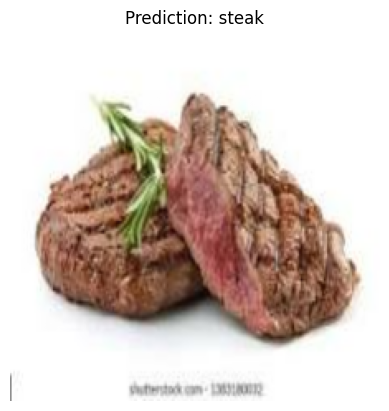

In [ ]:
pred_and_plot(model_8, "/Stake.jpeg", class_names)

In [ ]:
# Yes!! Model has predicted both the images correctly.

## Multi-class Classification



### 1. Import the data

In addition to the pizza and steak images, I pulled out another eight classes from
 [Food101 dataset].


In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-06-11 17:15:10--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.196.207, 74.125.134.207, 74.125.139.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.196.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  32.1MB/s    in 14s     

2024-06-11 17:15:24 (35.9 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



Listing Down all of the different directories and sub-directories in the 10_food_classes file.

In [ ]:
import os


for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 

In [ ]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

And get the class names from the subdirectories.

In [ ]:
#  Class Names for  multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 512, 3)


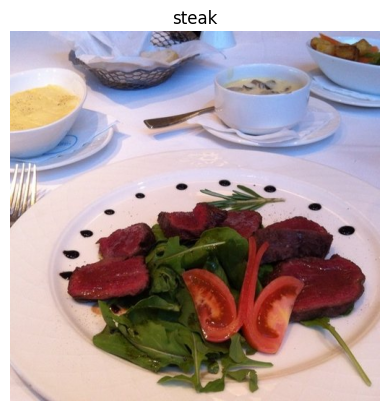

In [ ]:
# View a random image from the training dataset
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names)) # get a random class name

### 2. Preprocess the data (prepare it for a model)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


 Changed the class_mode parameter to categorical because here  dealing with 10 classes of food images.





### 3. Create a model (start with a baseline)

We can use the same model (TinyVGG) we used for the binary classification problem for our multi-class classification problem with a couple of small tweaks.

Namely:
* Changing the output layer to use have 10 ouput neurons (the same number as the number of classes we have).
* Changing the output layer to use 'softmax' activation instead of 'sigmoid' activation.
* Changing the loss function to be 'categorical_crossentropy' instead of 'binary_crossentropy'.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model_9 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_9.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

### 4. Fit a model



In [ ]:
# Fit the model
history_9 = model_9.fit(train_data, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 36s 148ms/step - loss: 2.1418 - accuracy: 0.2193 - val_loss: 1.9643 - val_accuracy: 0.3216
Epoch 2/5
235/235 [==============================] - 28s 121ms/step - loss: 1.7204 - accuracy: 0.4189 - val_loss: 1.9017 - val_accuracy: 0.3320
Epoch 3/5
235/235 [==============================] - 29s 125ms/step - loss: 1.1047 - accuracy: 0.6368 - val_loss: 2.1367 - val_accuracy: 0.3404
Epoch 4/5
235/235 [==============================] - 28s 119ms/step - loss: 0.4552 - accuracy: 0.8599 - val_loss: 3.0122 - val_accuracy: 0.2756
Epoch 5/5
235/235 [==============================] - 32s 136ms/step - loss: 0.1320 - accuracy: 0.9640 - val_loss: 3.9332 - val_accuracy: 0.2848


### 5. Evaluate the model


In [ ]:
# Evaluate on the test data
model_9.evaluate(test_data)

79/79 [==============================] - 7s 90ms/step - loss: 3.9332 - accuracy: 0.2848


[3.9332120418548584, 0.2847999930381775]

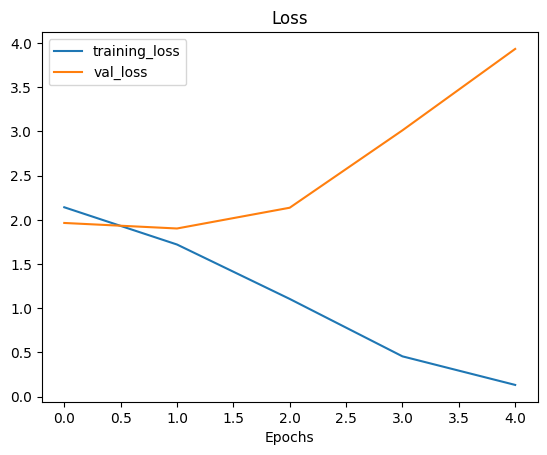

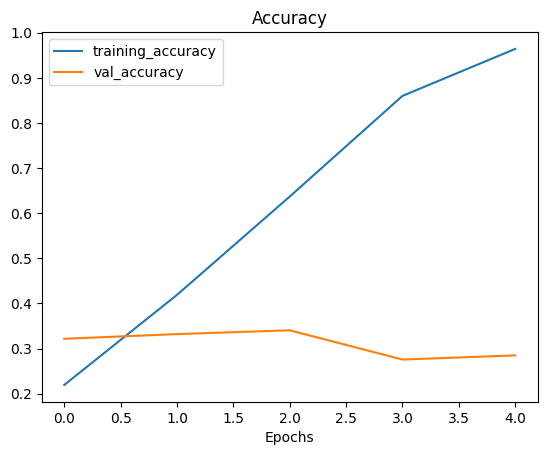

In [ ]:
# Check out the model's loss curves on the 10 classes of data
plot_loss_curves(history_9)

We can there is a quite the gap between the training and validation loss curves.


It means our model is "overfitting" the training set quite badly.

### 6. Adjust the model parameters



In [ ]:
# Try a simplified model (removed two layers)

model_10 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 32s 128ms/step - loss: 2.1607 - accuracy: 0.2184 - val_loss: 1.9891 - val_accuracy: 0.2980
Epoch 2/5
235/235 [==============================] - 35s 150ms/step - loss: 1.7739 - accuracy: 0.3944 - val_loss: 1.9115 - val_accuracy: 0.3360
Epoch 3/5
235/235 [==============================] - 30s 130ms/step - loss: 1.3140 - accuracy: 0.5707 - val_loss: 2.1005 - val_accuracy: 0.2976
Epoch 4/5
235/235 [==============================] - 29s 123ms/step - loss: 0.8420 - accuracy: 0.7428 - val_loss: 2.4330 - val_accuracy: 0.2980
Epoch 5/5
235/235 [==============================] - 30s 129ms/step - loss: 0.4415 - accuracy: 0.8715 - val_loss: 2.9242 - val_accuracy: 0.2788


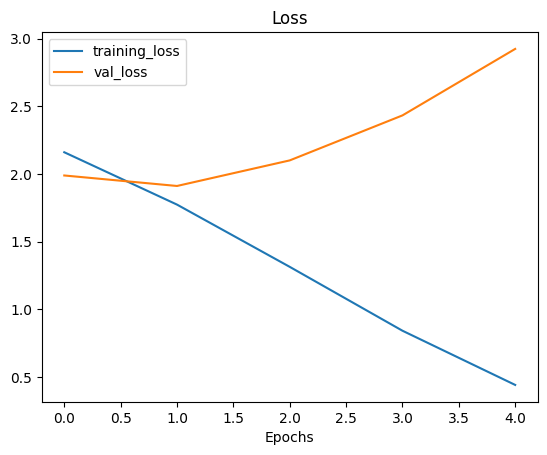

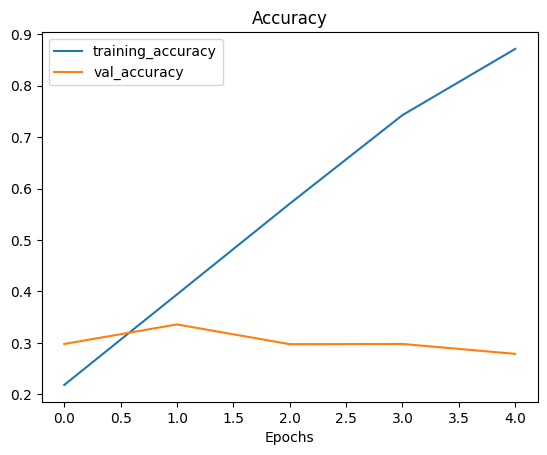

In [ ]:
# The loss curves of model_10
plot_loss_curves(history_10)

Even with a simplifed model, it looks like our model is still dramatically overfitting the training data.
so lets try "Data Augmentation"


In [ ]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # Note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


Now we've got augmented data, let's see how it works with the same model as before ("model_10").



In [ ]:
# Clone the model (use the same architecture)
model_11 = tf.keras.models.clone_model(model_10)

# Compile the cloned model (same setup as used for model_10)
model_11.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_11 = model_11.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 108s 452ms/step - loss: 2.3184 - accuracy: 0.1609 - val_loss: 2.0814 - val_accuracy: 0.2496
Epoch 2/5
235/235 [==============================] - 109s 464ms/step - loss: 2.1138 - accuracy: 0.2433 - val_loss: 2.0076 - val_accuracy: 0.2792
Epoch 3/5
235/235 [==============================] - 113s 482ms/step - loss: 2.0590 - accuracy: 0.2725 - val_loss: 1.9101 - val_accuracy: 0.3348
Epoch 4/5
235/235 [==============================] - 120s 510ms/step - loss: 2.0192 - accuracy: 0.2915 - val_loss: 1.8738 - val_accuracy: 0.3500
Epoch 5/5
235/235 [==============================] - 105s 447ms/step - loss: 1.9761 - accuracy: 0.3091 - val_loss: 1.8629 - val_accuracy: 0.3684


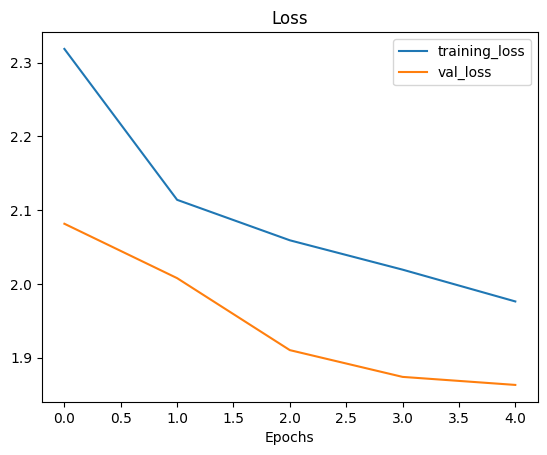

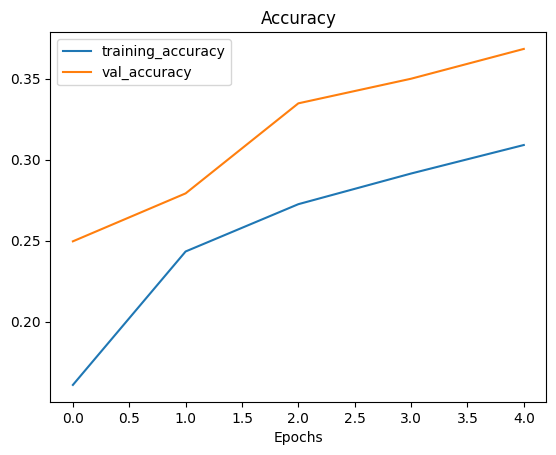

In [ ]:
# Checking model's performance with augmented data
plot_loss_curves(history_11)

Looking much better, the loss curves are much closer to eachother. Although the model didn't perform as well on the augmented training set, it performed much better on the validation dataset.

It even looks like if we kept it training for longer (more epochs) the evaluation metrics might continue to improve.

## Making a prediction with our trained model




In [ ]:
# classes
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

 Let's get some of our custom images.


In [ ]:
# -q is for "quiet"
!wget -q
!wget -q


1/1 [==============================] - 0s 109ms/step


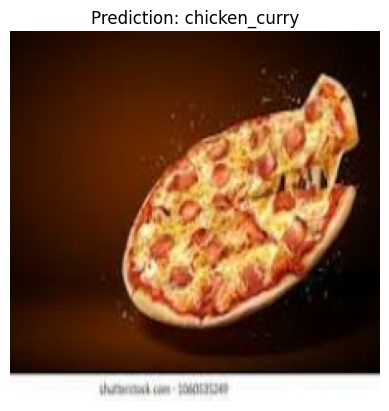

In [ ]:
# Make a prediction using model_11
pred_and_plot(model=model_11,
              filename="/Pizza.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 28ms/step


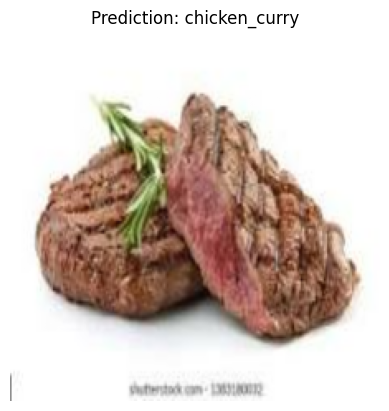

In [ ]:
pred_and_plot(model_11, "/Stake.jpeg", class_names)

'Chicken_Curry' There must be something wrong...

Let's makes a prediction without using the function and see where it might be going wrong.

1/1 [==============================] - 0s 19ms/step


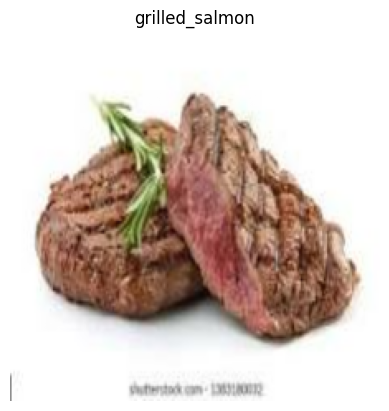

In [ ]:
# Load in and preprocess our custom image
img = load_and_prep_image("/Stake.jpeg")

# Make a prediction
pred = model_11.predict(tf.expand_dims(img, axis=0))

# Match the prediction class to the highest prediction probability
pred_class = class_names[pred.argmax()]
plt.imshow(img)
plt.title(pred_class)
plt.axis(False);

The "pred_and_plot" function was designed to be used with binary classification models where as our current model is a multi-class classification model.

The main difference lies in the output of the "predict" function.

In [ ]:
# Check the output of the predict function
pred = model_11.predict(tf.expand_dims(img, axis=0))
pred

1/1 [==============================] - 0s 19ms/step


array([[0.04410508, 0.1201237 , 0.11275682, 0.28409818, 0.08073059,
        0.06102398, 0.02322203, 0.02999606, 0.19759625, 0.04634732]],
      dtype=float32)

Since our model has a "softmax" activation function and 10 output neurons, it outputs a prediction probability for each of the classes in our model.

The class with the highest probability is what the model believes the image contains.

 Find the maximum value index using ['argmax']and then use that to index our 'class_names' list to output the predicted class.

In [ ]:
# Find the predicted class name
class_names[pred.argmax()]

'grilled_salmon'

In [ ]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 30ms/step


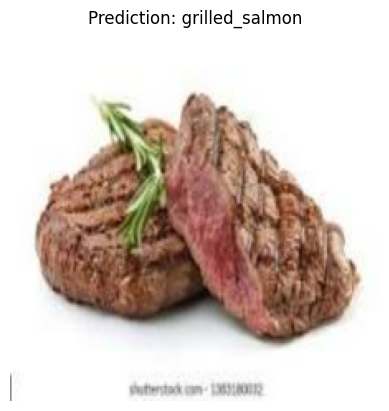

In [ ]:
pred_and_plot(model_11, "/Stake.jpeg", class_names)

1/1 [==============================] - 0s 22ms/step


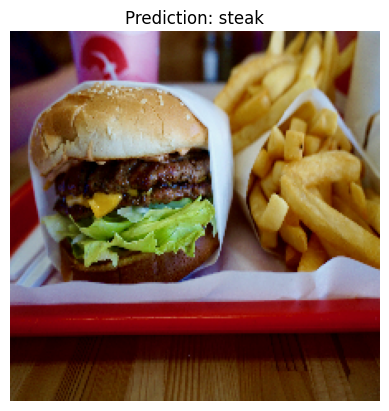

In [ ]:
pred_and_plot(model_11, "03-hamburger.jpeg", class_names)

Our model's predictions aren't very good, this is because it's only performing at ~35% accuracy on the test dataset.

It can be make better [transfer learning] is going to step things up a notch.

## Saving and loading our model

Once We've trained a model, we can save it and load it somewhere else.

To do so, we can use the ['save'] and ['load_model'] functions.

In [ ]:
# Save a model
model_11.save("saved_trained_model")

In [ ]:
# Load in a model and evaluate it
loaded_model_11 = tf.keras.models.load_model("saved_trained_model")
loaded_model_11.evaluate(test_data)

79/79 [==============================] - 7s 93ms/step - loss: 1.8629 - accuracy: 0.3684


[1.8628896474838257, 0.3684000074863434]

In [ ]:
# Compare our unsaved model's results (same as above)
model_11.evaluate(test_data)

79/79 [==============================] - 8s 94ms/step - loss: 1.8629 - accuracy: 0.3684


[1.8628896474838257, 0.3684000074863434]

In [ ]:
# There is scope for improvement using Transfer Learning

----------------------x-----------------------------------x------------------------x-----------------------------------x--
----------------------x-----------------------------------x--
----------------------x----------------